# Activity: Multiple Linear Regression - California Housing Dataset

### Overview
This session deepens our engagement with the California Housing dataset as we explore the realm of multiple linear regression. Our journey in predictive modeling evolves as we leverage multiple features to enhance our understanding of complex relationships within the data.

### Objective
The primary goal is to expand our knowledge of regression analysis by implementing a multiple linear regression model. We'll examine the intricacies of using several predictors, refine our model through feature selection and engineering, and evaluate its performance rigorously.

### What We Will Do:
- **Data Preparation**: Load and preprocess the data, ensuring it's clean and ready for analysis.
- **Feature Engineering**: Identify and select significant variables that contribute to the housing prices.
- **Data Standardization**: Implement scaling to normalize our feature set, optimizing it for the regression model.
- **Model Development**: Construct a multiple linear regression model, utilizing our selected features to predict housing prices.
- **Parameter Interpretation**: Delve into the model's coefficients and intercept, unraveling the influence of each predictor.
- **Model Evaluation**: Critically assess the model's accuracy using metrics such as R-squared, MAE, and RMSE.
- **Model Diagnostics**: Conduct residual analysis to check for assumptions and improve model reliability.
- **Outcome Interpretation**: Draw conclusions from the model's results and the implications of our data preprocessing.

Upon completing this activity, we will possess a comprehensive understanding of constructing and enhancing a multiple linear regression model. We will be fully equipped to transfer these methods to comparable datasets, enabling us to make well-informed choices underpinned by meticulous data analysis.

## 1. Import necessary libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing # to Load the california housing dataset

from sklearn.model_selection import train_test_split #to split the data into training set and test set
from sklearn.preprocessing import StandardScaler # For Feature scaling : Standardization 

from sklearn.linear_model import LinearRegression # For Linear Regression Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # For Linear Regression Metrics


# Append the parent directory to the Python path for module imports
import sys
sys.path.append('..')  # Include the parent directory in the Python path

# Import the remove_outliers function defined in a '.py' file from 'scr' folder 
from src.remove_outliers import remove_outliers

## 2. Loading the California Housing Dataset

- Load the California Housing dataset

In [3]:
# Load the California Housing dataset
data = fetch_california_housing()

We load the data from `sklearn.datasets`. The dataset is returned in a dictionary-like object.

- Convert the loaded data into a pandas DataFrame and set the column names

In [4]:
# Convert the loaded data into a pandas DataFrame and set the column names
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedianHouseValue'] = data.target  # Adding the target variable as a new column

We convert the dictionary into a `pandas DataFrame`, which allows for easier data manipulation. We also set the column names based on the dataset's feature names and add the target variable.

## 3. Exploratory Data Analysis

We review the dataset to understand its structure using `head()` to see the first few entries, `info()` for a summary including data types, and `describe()` for statistical details.

- Displays the first 5 rows of the dataset

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- Provides a concise summary of the DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- Shows the statistical details of the dataset

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


- Check for missing values and data types

In [12]:
df.isnull().sum()

MedInc              0
HouseAge            0
AveRooms            0
AveBedrms           0
Population          0
AveOccup            0
Latitude            0
Longitude           0
MedianHouseValue    0
dtype: int64

We check for missing values in each column to ensure the data's integrity.

No missing values have been identified.

- The California Housing dataset from sklearn does not contain categorical features, there's no need for encoding.

### **Additional preprocessing**

Before building a multiple linear regression model, it is often recommended to perform feature scaling. This is particularly important when the features have different scales and units, as is the case with the California Housing dataset. Feature scaling helps to normalize the data within a particular range and also to speed up calculations in an algorithm. The two common methods for feature scaling are normalization (or Min-Max scaling) and standardization (Z-score normalization):

- **Normalization** adjusts the data so that the range is between 0 and 1.
- **Standardization** adjusts the data so that it has a mean of 0 and a standard deviation of 1.

Both methods ensure that the features contribute equally to the result and help the convergence of the model during the training process. Since linear regression can be sensitive to the scale of input features, applying standardization would be a prudent choice to ensure the model performs optimally.

---

## 4. Data Preprocessing & Feature Engineering

### 1. Feature Selection for Multiple Linear Regression

- Generate the correlation matrix

In [17]:
correlation_matrix = df.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedianHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


- Plot the correlation matrix using seaborn

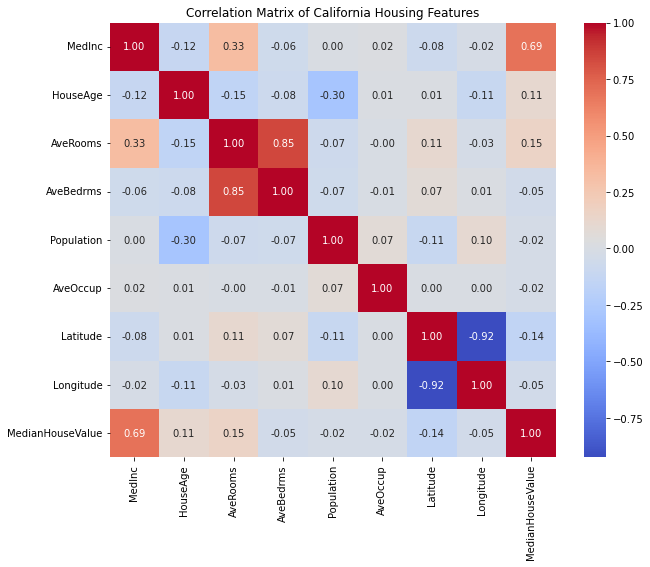

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of California Housing Features")
plt.show()

1. **Strong Correlation with Target Variable:**  
    - 'MedInc' has the highest positive correlation with the target (0.688075). 

2. **Addressing Multicollinearity:**

    - Upon examining 'AveRooms' and 'AveBedrms', we observe a substantial correlation (0.847621) between these two features. Since 'MedInc' shows the strongest correlation with our target and is a crucial variable, we opt for 'AveRooms' over 'AveBedrms' based on its marginally stronger correlation with the target variable. Therefore, we'll exclude 'AveBedrms' to mitigate multicollinearity.

    - The correlation between 'Latitude' and 'Longitude' is highly negative (-0.924664), reflecting their inherent geographic relationship. Common practice in spatial data analysis would not automatically exclude one due to multicollinearity because they capture distinct geographic dimensions. Nonetheless, given their relatively weak correlation with the target variable, there are two potential courses of action: we may consider excluding one to simplify the model or devise a new feature encapsulating both variables. For instance, crafting a feature such as 'Distance to a Central Point' might effectively summarize the geographic influence on housing prices while reducing multicollinearity.

**Feature Engineering Proposal:**

Should we decide to retain geographic information, we would need to conceive a feature that curbs the issue of multicollinearity. A pragmatic approach might involve calculating the distance to a significant urban center or a predefined point that is of interest in California. This newly engineered feature could serve as a surrogate for 'Latitude' and 'Longitude', capturing the locational characteristics without the complication of multicollinearity.

- **Feature Selection:**

Based on the analysis and consideration to avoid multicollinearity:

- **Selected Features:** 'MedInc', 'AveRooms', 'HouseAge'
- **Dropped Features:** 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude' 

The reason to drop 'Population' and 'AveOccup' is due to their low correlation with the target variable, which implies they might not provide significant predictive power.

In [12]:
# Manually selected features
selected_features = ['MedInc', 'AveRooms', 'HouseAge']

# DataFrame with selected features for regression model
X = df[selected_features]

# Target variable for the model
y = df['MedianHouseValue']

In [77]:
X.head()

,MedInc,AveRooms,HouseAge
0,8.3252,6.984127,41.0
1,8.3014,6.238137,21.0
2,7.2574,8.288136,52.0
3,5.6431,5.817352,52.0
4,3.8462,6.281853,52.0


In [32]:
y[:5]

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedianHouseValue, dtype: float64

### 2. Splitting the Dataset with Selected Features

- A training set is a subset of the dataset used to build predictive models. A test set is a subset used to assess the performance of the model.
- The training set allows the model to learn the patterns in the data, while the testing set acts as new, unseen data to evaluate the model's generalization capability.
- The size of the dataset can influence the train/test split ratio because with a larger dataset, you may have enough data to split off a larger test set while still having plenty of data for training. With smaller datasets, you might choose a smaller test set to ensure the training set is large enough.

In [13]:
# Splitting the dataset into training (80%) and testing (20%) sets with a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Printing the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (16512, 3) (16512,)
Testing set shape: (4128, 3) (4128,)


### 3. Feature Scaling

Feature scaling is a crucial step in preparing data for many machine learning algorithms, especially those that use distance measures like linear regression. Scaling ensures that all features contribute equally to the result and helps gradient descent converge more quickly.

In multiple linear regression, feature scaling is important because it standardizes the range of independent variables or features of data. Since the scale of the variables might differ significantly, unscaled data can potentially result in a biased or invalid model. A feature with a broad range of values can dominate the model and make the model unable to learn from other features correctly.

The difference between fitting and transforming the scaler on the training data versus the testing data is that 'fit' calculates the parameters (mean and standard deviation for StandardScaler) necessary for the transformation on the training dataset, while 'transform' uses these parameters to scale the data. The testing data should only be transformed using the parameters from the training data to simulate the real-world scenario where the model is applied to unseen data.

In [14]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled are the scaled versions of the training and testing sets, respectively

After this code, `X_train_scaled` and `X_test_scaled` are arrays containing the scaled values of your features. It's important to note that `fit` should only be called on `X_train` to prevent information leakage from the test set into the model training process. The same scaling parameters are then used to transform `X_test`.

Once you have scaled your data using StandardScaler from sklearn.preprocessing, you can transform the resulting NumPy arrays back into pandas DataFrames. This can be useful if you want to retain the DataFrame format for easier manipulation and indexing. 

In [15]:
# Convert the scaled arrays back into DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Display the shapes to confirm they're still the same
print("Scaled training DataFrame shape:", X_train_scaled_df.shape)
print("Scaled testing DataFrame shape:", X_test_scaled_df.shape)

Scaled training DataFrame shape: (16512, 3)
Scaled testing DataFrame shape: (4128, 3)


Here, the `DataFrame` constructor is used to create a new DataFrame from the `X_train_scaled` and `X_test_scaled` arrays. The column names from the original `X_train` and `X_test` DataFrames are used to label the columns in the new scaled DataFrames, and the original indices are used to label the rows. This ensures that the new DataFrames maintain the same structure and labeling as the original DataFrames, with the only difference being the scaled values.


In [16]:
# Optionally, display the first few rows to see the scaled data
print(X_train_scaled_df.head())
print(X_test_scaled_df.head())

         MedInc  AveRooms  HouseAge
5817   0.084597 -0.359615  1.308806
16856 -0.341088 -0.403418  0.830051
5494   4.302134  0.249101 -1.005177
17053  1.192773 -0.078698  0.909843
15836  0.211151 -0.072009  1.388598
         MedInc  AveRooms  HouseAge
18552  0.174004 -0.220962  0.271503
4724   0.643969  0.009966  1.867353
15423 -0.552557 -0.169301 -1.244554
1763  -0.103146 -0.533266  1.308806
14100 -1.223476 -0.989676  0.191711


- **Note:** Remember that the scaling should be done after any train-test split to ensure that the test data remains unseen and is not influenced by the training process.

## 4. Building the Multiple Linear Regression Model

To build a Multiple Linear Regression model using `scikit-learn`, We first create an instance of the `LinearRegression` class and fit it to our scaled training data along with the corresponding target values (`y_train`).

In [17]:
# Initialize the Multiple Linear Regression model
linear_regression_model = LinearRegression()

# Train the model on the training data
linear_regression_model.fit(X_train_scaled_df, y_train)

LinearRegression()

- When transitioning from a simple linear regression (one independent variable) to a multiple linear regression (more than one independent variable), you can expect the model to potentially capture more complexity and achieve better performance due to the consideration of multiple factors influencing the target variable. However, with more variables, the interpretation becomes more challenging, and there's an increased risk of overfitting if not managed properly.

## 5. Interpret the Model Parameters

We will examine the coefficients of our trained model to see how each feature influences the target variable.

In [18]:
# Getting the coefficients
coefficients = linear_regression_model.coef_

# Creating a dataframe for easier interpretation
coef_df = pd.DataFrame(coefficients, index=X_train_scaled_df.columns, columns=['Coefficient'])
coef_df

,Coefficient
MedInc,0.844375
AveRooms,-0.085825
HouseAge,0.207161


The output `coef_df` shows us the coefficients for each feature. A positive coefficient means that as the feature value increases, the target variable is expected to increase, assuming all other features remain constant. Conversely, a negative coefficient indicates an inverse relationship.

In the context of scaled features, the coefficients represent the change in the dependent variable for a one standard deviation increase in the predictor variable. If a coefficient is large (in absolute value), it suggests that the feature it represents is more important in predicting the target variable.

## 6. Model Evaluation

In [19]:
# Predicting on training data
y_train_pred = linear_regression_model.predict(X_train_scaled_df)

# Predicting on test data
y_test_pred = linear_regression_model.predict(X_test_scaled_df)

# Calculate R-squared for both sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Absolute Error for both sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error for both sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error for both sets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Creative Printing of Results:
metrics = [
    ('R-squared', r2_train, r2_test),
    ('Mean Absolute Error', mae_train, mae_test),
    ('Root Mean Squared Error', rmse_train, rmse_test)
]

# Create a header
header = f"{'Metric':<25} {'Training Set':<15} {'Test Set':<15}"
print(header)
print('-' * len(header))

# Print each metric for both training and test sets
for name, train_metric, test_metric in metrics:
    print(f"{name:<25} {train_metric:<15.2f} {test_metric:<15.2f}")

print("\nModel Performance Analysis:")
if r2_train > r2_test and rmse_train < rmse_test:
    print("Caution: The model may be overfitting to the training data.")
else:
    print("Good: The model's performance is consistent across training and test sets, indicating generalization.")

Metric                    Training Set    Test Set       
---------------------------------------------------------
R-squared                 0.51            0.52           
Mean Absolute Error       0.60            0.61           
Root Mean Squared Error   0.81            0.81           

Model Performance Analysis:
Good: The model's performance is consistent across training and test sets, indicating generalization.


- **Result Interpretation:**
    - **R-squared**: The R-squared values for both the training and test sets are quite close, 0.51 and 0.52, respectively. This suggests that the model explains a similar proportion of the variance in the target variable for both sets, which is a good indicator of the model's consistency.

    - **Mean Absolute Error (MAE)**: The MAE is also very similar between the training and test sets, 0.60 and 0.61, respectively. This shows that the model has, on average, a similar error margin for both training and test predictions.

    - **Root Mean Squared Error (RMSE)**: The RMSE is equal for both sets, 0.81. This indicates the model’s predictions are off by the same margin of the standard deviation of the errors over both datasets.


In summary, the metrics indicate that the model performs similarly on both the training and test sets, suggesting good generalization. There's no significant discrepancy that would indicate overfitting, which is when a model performs much better on the training data than on the test data. 

However, depending on the context, an R-squared of around 0.5 might be considered low, suggesting that the model does not explain as much of the variability in the dependent variable as one might like. It's worth considering whether model complexity needs to be increased or if additional relevant features are necessary to capture more of the variance.

## 7. Model Diagnostics

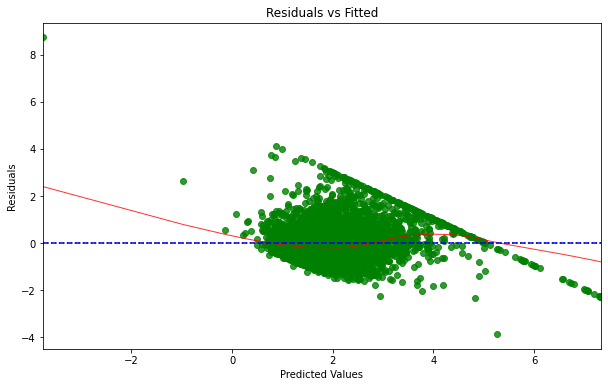

In [20]:
# Calculate residuals
residuals = y_test - y_test_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, color="g", line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='blue', linestyle='--')
plt.show()

The residual plot shows the relationship between the predicted values of your model and the residuals, which are the differences between the observed and predicted values. Here's the interpretation based on the plot:

1. **Spread of Residuals Around Zero Line:**
   - The residuals do not appear to be randomly scattered around the zero line. Instead, there is a clear pattern where the residuals seem to increase with the magnitude of the predicted value, suggesting that the model's errors are also increasing with the predicted value.
   - Such a pattern could imply that the model is more accurate for smaller predicted values and less accurate for larger ones, which is a sign of heteroscedasticity. This is where the variability of the error is not constant across levels of an independent variable.

2. **Patterns or Systematic Errors:**
   - The 'fan' or 'cone' shape visible in the plot—where the spread of residuals increases with the size of the predicted value—indicates that the assumption of homoscedasticity (constant variance of errors) is violated.
   - The systematic pattern suggests that the model may be underfitting the data for higher values, meaning the model does not fully capture the relationship between the independent and dependent variables, particularly at the higher range of predictions.

**To Address These Observations:**
- We may consider transforming the dependent variable or the independent variables to stabilize the variance of the residuals.
- Look into adding higher-order terms or interaction effects if the relationship between predictors and the target is not purely linear.
- Examine if there are any outliers or leverage points that disproportionately influence the model's predictions and consider whether it's appropriate to include them.

In summary, the residual plot suggests that the model's current form might not be the best fit for the data, particularly at higher predicted values, and further model refinement or the use of a different model may be warranted.

## 8. Interpretation of Results

In [21]:
# Retrieve the coefficients and pair them with feature names
coefficients = pd.DataFrame(linear_regression_model.coef_, X_train.columns, columns=['Coefficient'])

# Sort the coefficients by their absolute values in descending order for better comparison
coefficients['Absolute_Value'] = coefficients['Coefficient'].abs()
sorted_coefficients = coefficients.sort_values('Absolute_Value', ascending=False)

# Display the coefficients
print("Coefficients in the regression model:\n")
print(sorted_coefficients)

# Interpret the coefficients
print("\nInterpretation of the coefficients:\n")
for feature, row in sorted_coefficients.iterrows():
    print(f"{feature}: A one-standard-deviation increase in '{feature}' is associated with a {row['Coefficient']:.4f} {'increase' if row['Coefficient'] > 0 else 'decrease'} in the target variable.")

Coefficients in the regression model:

          Coefficient  Absolute_Value
MedInc       0.844375        0.844375
HouseAge     0.207161        0.207161
AveRooms    -0.085825        0.085825

Interpretation of the coefficients:

MedInc: A one-standard-deviation increase in 'MedInc' is associated with a 0.8444 increase in the target variable.
HouseAge: A one-standard-deviation increase in 'HouseAge' is associated with a 0.2072 increase in the target variable.
AveRooms: A one-standard-deviation increase in 'AveRooms' is associated with a -0.0858 decrease in the target variable.


- **Coefficient sign:**
The sign of a coefficient indicates the direction of the relationship between a predictor variable and the target variable. A positive coefficient means that there is a positive association – as the predictor variable increases by one standard deviation, the target variable is also expected to increase, holding all other variables constant. Conversely, a negative coefficient indicates a negative association – as the predictor variable increases by one standard deviation, the target variable is expected to decrease, again holding other variables constant.

In this case:
- A positive `MedInc` coefficient means that as median income (`MedInc`) increases, the median house value is expected to increase.
- A positive `HouseAge` coefficient suggests that as the age of the house (`HouseAge`) increases, the median house value is also expected to increase.
- A negative `AveRooms` coefficient indicates that as the average number of rooms per dwelling (`AveRooms`) increases, the median house value is expected to decrease.



- **Coefficient magnitude:**

The magnitude of a coefficient signifies the strength of the impact of the corresponding predictor on the target variable. Larger magnitudes mean a stronger effect, and smaller magnitudes mean a weaker effect.

From the provided coefficients:
- `MedInc` has the largest coefficient with an absolute value of 0.8444, indicating that median income is the most influential factor on median house value among the three features considered. An increase in median income is associated with a substantial increase in median house value.
- `HouseAge` has a smaller positive coefficient of 0.2072, suggesting that while there is a positive association with median house value, the impact of house age is less significant than median income.
- `AveRooms` has the smallest absolute value of the coefficient (-0.0858), indicating that it has the least influence on median house value compared to `MedInc` and `HouseAge`. Interestingly, this influence is in the negative direction, meaning that an increase in the average number of rooms per dwelling is associated with a slight decrease in median house value, which could suggest that beyond a certain point, larger dwellings (potentially indicating lower density or possibly higher maintenance costs) are not valued as much in the market represented by the dataset.

In conclusion, median income (`MedInc`) is the most significant predictor of median house value, followed by the age of the house (`HouseAge`), with the number of average rooms (`AveRooms`) having a lesser and negative impact. These interpretations must be considered in the context of the housing market and may be subject to additional factors not captured by the model.

## 8. Re-train Model Without Outliers 

### 1. Outlier Removal, Linear Regression Optimization, and Model Assessment

- The `remove_outliers` function defines the interquartile range (IQR) and filters out any data points that are outside 1.5 times the IQR.
- We then scale the features using `StandardScaler` since model coefficients assume that all variables are on the same scale.
- After fitting the model, we predict and compute the metrics for both the training and test datasets.
- Finally, we print out the metrics for the new model and the difference from the original model's metrics.

In [23]:
# ------------------------------
# DATA PREPROCESSING
# ------------------------------

# Remove outliers from the dataset using the predefined function 'remove_outliers' 
# This function if imported from the src folder 
df_clean = remove_outliers(df, df.columns)

# ------------------------------
# FEATURE SELECTION
# ------------------------------

# Define features for regression model
selected_features = ['MedInc', 'AveRooms', 'HouseAge'] # Replace with your actual features
X = df_clean[selected_features]

# Define the target variable
y = df_clean['MedianHouseValue']

# ------------------------------
# FEATURE SCALING
# ------------------------------

# Standardize the features
scaler = StandardScaler()
X_clean_scaled = scaler.fit_transform(X)

# ------------------------------
# SPLITTING THE DATA
# ------------------------------

# Split the data into training and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean_scaled, y, test_size=0.2, random_state=23)

# ------------------------------
# MODEL TRAINING
# ------------------------------

# Train a Linear Regression model
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)

# ------------------------------
# MODEL PREDICTION
# ------------------------------

# Make predictions using the trained model
y_train_pred_clean = model_clean.predict(X_train_clean)
y_test_pred_clean = model_clean.predict(X_test_clean)

# ------------------------------
# MODEL EVALUATION
# ------------------------------

# Calculate evaluation metrics for the cleaned data model
r2_train_clean = r2_score(y_train_clean, y_train_pred_clean)
r2_test_clean = r2_score(y_test_clean, y_test_pred_clean)
mae_train_clean = mean_absolute_error(y_train_clean, y_train_pred_clean)
mae_test_clean = mean_absolute_error(y_test_clean, y_test_pred_clean)
rmse_train_clean = np.sqrt(mean_squared_error(y_train_clean, y_train_pred_clean))
rmse_test_clean = np.sqrt(mean_squared_error(y_test_clean, y_test_pred_clean))

# Print out the metrics for the cleaned model in a visually appealing format
print(f'Cleaned Model Metrics:\n'
      f'  Training R-squared: {r2_train_clean:.2f}\n'
      f'  Test R-squared: {r2_test_clean:.2f}\n'
      f'  Training MAE: {mae_train_clean:.2f}\n'
      f'  Test MAE: {mae_test_clean:.2f}\n'
      f'  Training RMSE: {rmse_train_clean:.2f}\n'
      f'  Test RMSE: {rmse_test_clean:.2f}')

# ------------------------------
# COMPARE WITH ORIGINAL MODEL
# ------------------------------

# Assume original model metrics are stored in similarly named variables without '_clean'
print("\nComparison with the Original Model:")
print(f'  Difference in Training R-squared: {r2_train_clean - r2_train:.2f}')
print(f'  Difference in Test R-squared: {r2_test_clean - r2_test:.2f}')
print(f'  Difference in Training MAE: {mae_train_clean - mae_train:.2f}')
print(f'  Difference in Test MAE: {mae_test_clean - mae_test:.2f}')
print(f'  Difference in Training RMSE: {rmse_train_clean - rmse_train:.2f}')
print(f'  Difference in Test RMSE: {rmse_test_clean - rmse_test:.2f}')

Cleaned Model Metrics:
  Training R-squared: 0.50
  Test R-squared: 0.48
  Training MAE: 0.51
  Test MAE: 0.51
  Training RMSE: 0.67
  Test RMSE: 0.68

Comparison with the Original Model:
  Difference in Training R-squared: -0.01
  Difference in Test R-squared: -0.03
  Difference in Training MAE: -0.08
  Difference in Test MAE: -0.10
  Difference in Training RMSE: -0.14
  Difference in Test RMSE: -0.13


The provided output from Task 12 offers insights into the performance of a Linear Regression model trained on data with outliers removed (Cleaned Model) compared to the original model. Here's an interpretation of these results:

#### Cleaned Model Performance
- **R-squared:** The R-squared values for both training (0.50) and testing (0.48) indicate that around 50% of the variance in the target variable is explained by the model. This is a moderate level of explanatory power.
- **MAE (Mean Absolute Error):** The MAE values for both training and testing are 0.51, suggesting that the model's predictions are, on average, 0.51 units away from the actual values. This is a measure of the average magnitude of the errors in the predictions.
- **RMSE (Root Mean Squared Error):** The RMSE values are 0.67 for training and 0.68 for testing, indicating the model's predictions are within approximately 0.67 to 0.68 units of the actual values on average. RMSE gives a relatively higher weight to larger errors, thus it's a critical measure of prediction accuracy.

#### Comparison with Original Model
- **R-squared:** The decrease in R-squared for both training (-0.01) and testing (-0.03) suggests a slight reduction in the model's ability to explain the variance in the dataset after removing outliers.
- **MAE and RMSE:** Both MAE and RMSE show improvements in the cleaned model. The decreases in MAE (-0.08 for training and -0.10 for testing) and RMSE (-0.14 for training and -0.13 for testing) indicate that the cleaned model is making more accurate predictions, with reduced average errors.

#### Interpretation
- The slight reduction in R-squared values after cleaning the data suggests that the outliers may have been contributing some information to the model. Their removal has led to a slight decrease in the model's explanatory power.
- The improvements in both MAE and RMSE metrics indicate that the cleaned model is more accurate in its predictions. The errors are lower on average, implying that the cleaned model's predictions are more reliable.
- The trade-off between a minor loss in explanatory power (R-squared) and gains in predictive accuracy (MAE, RMSE) is evident. This suggests that while the model became slightly less effective at explaining the variance in the data, it became more accurate and reliable in its predictions.
- The decision to use the cleaned model over the original one should be based on the specific requirements of the analysis. If the goal is more accurate and reliable predictions, the cleaned model is preferable. However, if explaining the maximum variance is crucial, the original model might be more suitable.

In conclusion, the cleaned model is more reliable in terms of prediction errors but slightly worse at explaining the variability of the data. Depending on the specific context and goal of the model (whether predictive accuracy or explanatory power is more important), one might choose to use the original model or the cleaned model. If the goal is to have a model that is less sensitive to extreme values and provides more consistent predictions, the cleaned model may be preferable. However, if the goal is to explain the most variance possible, then the original model with outliers included might be better.

### 2. Model Diagnostics and Interpretation of Results 

#### 1. Residual plots

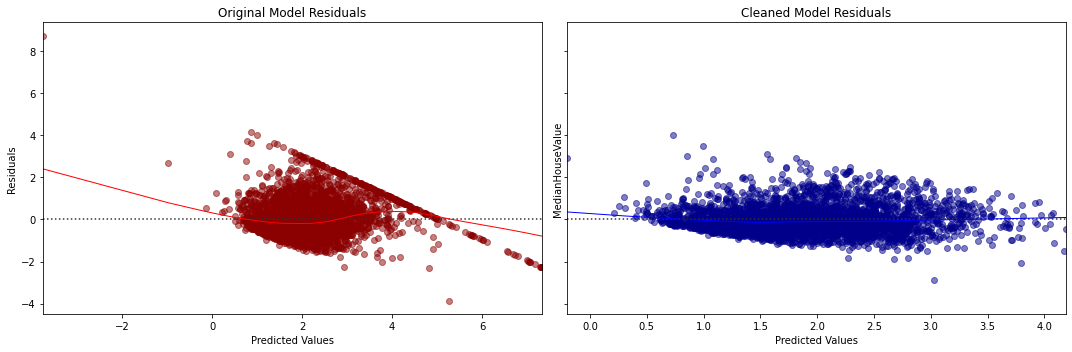

In [24]:
# Residuals
residuals_original = y_test - y_test_pred
residuals_clean = y_test_clean - y_test_pred_clean  # Assuming y_test_cleaned is the actual values without outliers

# Set up the matplotlib figure
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

# Original model residual plot
sns.residplot(x=y_test_pred, y=residuals_original, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[0], scatter_kws={'alpha': 0.5, 'color': 'darkred'})
axs[0].set_title('Original Model Residuals')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Residuals')

# Cleaned model residual plot
sns.residplot(x=y_test_pred_clean, y=residuals_clean, lowess=True, line_kws={'color': 'blue', 'lw': 1}, ax=axs[1], scatter_kws={'alpha': 0.5, 'color': 'darkblue'})
axs[1].set_title('Cleaned Model Residuals')
axs[1].set_xlabel('Predicted Values')

# Adjust layout and plot
plt.tight_layout()
plt.show()


From the residual plots:

##### Original Model Residuals (Red)
- There's a clear pattern where residuals decrease as the predicted values increase, indicating that the model tends to underestimate the actual values for larger predictions.
- The spread of residuals also appears to increase with the predicted value, suggesting heteroscedasticity, meaning that the variance of the residuals is not constant across all levels of the independent variables.
- The presence of a pattern and increasing spread in the residuals implies that the original model may not be the best fit for the data, as it doesn't satisfy the assumption of homoscedasticity (constant variance) for linear regression.

##### Cleaned Model Residuals (Blue)
- The cleaned model's residuals are more uniformly scattered around the horizontal axis, indicating that the difference between the actual and predicted values is more consistent across all levels of prediction.
- There's still some pattern visible, with a slight fan shape suggesting potential heteroscedasticity, but it is less pronounced than in the original model's residuals.
- The overall spread of the residuals is more contained, implying that the cleaned model has less variance in its errors and may provide more reliable predictions.

##### General Observations
- The cleaned model seems to offer an improvement in terms of the residuals' distribution and variance, which can be indicative of better model performance.
- However, neither model perfectly satisfies the ideal residual distribution, which would be a random cloud of points centered around the horizontal axis with no discernible pattern.
- It's also important to consider that while residuals give us a visual understanding of model performance, quantitative measures such as R-squared, MAE, and RMSE are also crucial for a comprehensive evaluation.

In summary, the cleaned model exhibits a better residual pattern than the original model, suggesting that the data cleaning process has likely improved model performance. Nonetheless, there is room for further investigation or model refinement to address any remaining heteroscedasticity or patterns in the residuals.

#### 2. Interpret Model Parameters

    Feature  Original Coefficients  Cleaned Coefficients
0    MedInc               0.844375              0.847139
2  HouseAge               0.207161              0.169804
1  AveRooms              -0.085825             -0.310709


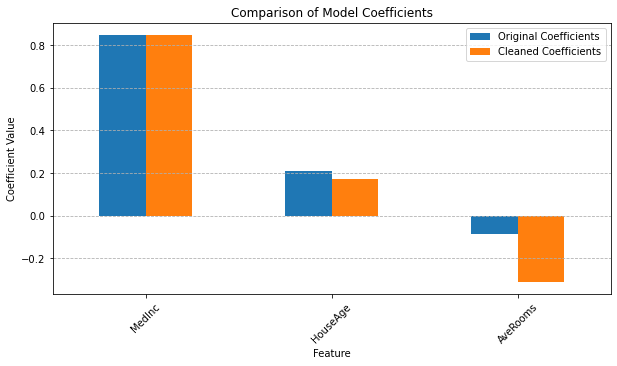

In [25]:
# Assuming you have the coefficients from both models
original_coeffs = linear_regression_model.coef_
cleaned_coeffs = model_clean.coef_

# You may also want to capture the intercepts
original_intercept = linear_regression_model.intercept_
cleaned_intercept = model_clean.intercept_


# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,  # Replace X.columns with the actual feature names if X is not a DataFrame
    'Original Coefficients': original_coeffs,
    'Cleaned Coefficients': cleaned_coeffs
})

# Sort by the absolute values of the original coefficients for better visualization
coeff_df['Original Absolute'] = coeff_df['Original Coefficients'].abs()
coeff_df.sort_values('Original Absolute', ascending=False, inplace=True)
coeff_df.drop('Original Absolute', axis=1, inplace=True)

# Display the DataFrame
print(coeff_df)

# Plot the coefficients for a visual comparison
coeff_df.plot(x='Feature', y=['Original Coefficients', 'Cleaned Coefficients'], kind='bar', figsize=(10, 5))
plt.title('Comparison of Model Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


For the coefficients:

1. **MedInc (Median Income):** The coefficient for MedInc increased slightly in the cleaned model. This feature continues to have a positive impact on the target variable, suggesting that higher median income is associated with higher median house values.

2. **HouseAge:** The coefficient for HouseAge decreased slightly in the cleaned model but remained positive, indicating that older houses are still associated with higher values, perhaps due to their location or other characteristics not captured by the model.

3. **AveRooms (Average Number of Rooms):** Interestingly, the coefficient for AveRooms in the cleaned model has become more negative. This could suggest that, with outliers removed, the model has become more sensitive to the number of rooms, perhaps indicating that beyond a certain number of rooms, additional rooms do not increase house value to the same extent.

The changes in the coefficients after cleaning the data imply that the outliers had some effect on the original model, potentially skewing its interpretation of the importance of features. The cleaned model provides a potentially more accurate reflection of the impact of each feature on the target variable.

In summary, while the cleaned model may provide a marginally better understanding of the relationship between the features and the target variable, neither model seems to perfectly capture the underlying patterns in the data. Further model refinement or selection of a more suitable modeling approach could be needed.